In [4]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
# Read in the titanic dataset
titanic_df = pd.read_csv("../Week 06/titanic.csv")
# To ensure I know what the data looks like
titanic_df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# What Model, and Why

For the Titanic dataset, our objective is to predict a binary outcome-- whether a passenger lives (1) or dies (0). For this, a logistic regression model makes sense, as what we are trying to predict is deterministic, in nature; it is either a one or a zero. KNN would also be a viable alternative, but logistic regression is a little more efficient when we know for certain that there are only two desirable outcomes.

It is important to note, however, that linear regression is not suitable for this task, as it is prone to produce redictions outside our valid range of outcomes: [0, 1].

# Crafting a Usable Dataframe for Logistic Regression Using Preprocessing

There are some columns, such as "Embarked", "Sex", and "Age" that do not function well with the model I am hoping to use. "Embarked", of course, has a string value, but as it is ordinal, it can easily be encoded to numerical values, handling null values with Southampton as it was the most common embarking point. Sex is much the same, but is entirely binary and has no null values, making encoding even simpler.

Age, however, is somewhat of an obstacle; although the values are floats, there are some null values, which are not legitimate values that the model can use to make predictions. As such, I could replace all null values with a 0, though this would distort the predictions, somewhat-- replacing all null values with the median makes a little more sense.

In [6]:
# Handle missing values in "Embarked"
titanic_df['Embarked'] = titanic_df['Embarked'].where(titanic_df['Embarked'].notnull(), 'S')

# Encode "Embarked" by mapping
embarked_map = {'S' : 1, 'C' : 2, 'Q' : 3}
titanic_df['Embarked'] = titanic_df['Embarked'].map(embarked_map)

# Encode "Sex" by mapping
sex_map = {'male' : 1, 'female' : 2}
titanic_df['Sex'] = titanic_df['Sex'].map(sex_map)

# Handle missing values in "Age" by replacing null values with the median
titanic_df['Age'] = titanic_df['Age'].where(titanic_df['Age'].notnull(), titanic_df['Age'].median())

# Create the necessary variables
X = titanic_df.drop(columns = ['Survived', 'Name', 'Ticket', 'Cabin'], axis = 1)
y = titanic_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2, stratify = y) 

# standardize
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [7]:
# Create and train the logistic regression model
logRegression = LogisticRegression(random_state = 2).fit(X_train, y_train)
predictedValues = logRegression.predict(X_test)

In [8]:
# Check the accuracy; not bad!
logRegression.score(X_test, y_test)

0.7821229050279329

# Thursday Warm Up

(<Figure size 640x480 with 3 Axes>,
 {('0', '0'): (0.0,
   np.float64(0.0),
   0.6114678006614971,
   np.float64(0.8154636061612806)),
  ('0', '1'): (0.0,
   np.float64(0.8187858652974932),
   0.6114678006614971,
   np.float64(0.18121413470250672)),
  ('1', '0'): (0.6164429250396065,
   np.float64(0.0),
   0.3835570749603936,
   np.float64(0.2744474938610429)),
  ('1', '1'): (0.6164429250396065,
   np.float64(0.27776975299725554),
   0.3835570749603936,
   np.float64(0.7222302470027444))})

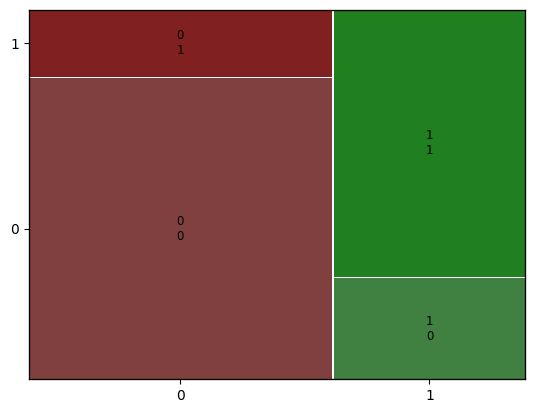

In [10]:
from sklearn.metrics import confusion_matrix
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.metrics import ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test, predictedValues)
mosaic(conf_matrix)

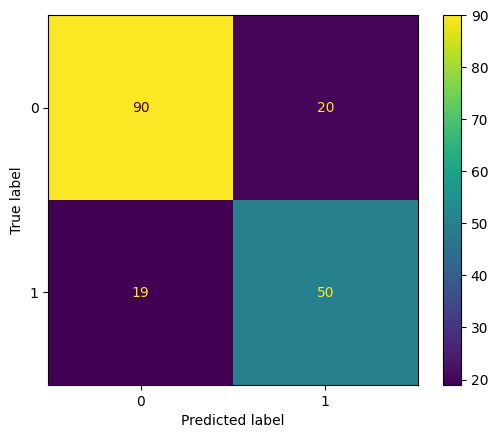

In [12]:
ConfusionMatrixDisplay.from_estimator(logRegression, X_test, y_test)

In [13]:
def precision_and_recall(calc_type:str, tp: int, tn: int,
                        fp: int, fn: int) -> float:
    if calc_type == "precision":
        value = tp / (tp + fp)
        # false positive are where we predicted someone would have a 
        # condition and they actually dont
        return value
    elif calc_type == "recall":
        value = tp / (tp + fn) 
        # false negatives are where we predicted someone would not have a 
        # condition and they actually do
        return value
    else:
        error_msg = "something happened here. check your inputs"
        return error_msg